In [9]:
#!pip install mahotas

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from PIL import Image
from skimage.measure import shannon_entropy
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Haralick = z tekstury (wymaga mahotas)
try:
    import mahotas
    haralick_available = True
except ImportError:
    print("⚠️ Mahotas not installed – Haralick features won't be used.")
    haralick_available = False

def extract_features_from_folders(folder_paths):
    all_features = []

    for folder_path in folder_paths:
        folder_path = os.path.normpath(folder_path)
        image_paths = glob.glob(os.path.join(folder_path, '**', '*.jpg'), recursive=True)
        image_paths += glob.glob(os.path.join(folder_path, '**', '*.png'), recursive=True)

        if len(image_paths) == 0:
            print(f"⚠️ Brak obrazków w folderze: {folder_path}")
            continue

        for image_path in image_paths:
            try:
                img = Image.open(image_path).convert('L')  # grayscale
                img_array = np.array(img).astype(np.uint8)

                features = {
                    'path': image_path,
                    'mean_intensity': np.mean(img_array),
                    'std_intensity': np.std(img_array),
                    'min_intensity': np.min(img_array),
                    'max_intensity': np.max(img_array),
                    'skewness': skew(img_array.flatten()),
                    'kurtosis': kurtosis(img_array.flatten()),
                    'entropy': shannon_entropy(img_array)
                }

                # Haralick features (jeśli dostępne)
                if haralick_available:
                    h = mahotas.features.haralick(img_array).mean(axis=0)
                    for i, val in enumerate(h):
                        features[f'haralick_{i+1}'] = val

                all_features.append(features)

            except Exception as e:
                print(f"❌ Błąd przy {image_path}: {e}")

    if len(all_features) == 0:
        print("🚫 Nie znaleziono żadnych poprawnych obrazków. Nie tworzę pliku.")
        return None

    df = pd.DataFrame(all_features)

    # Zapis
    os.makedirs("data_tables", exist_ok=True)
    base_name = '_'.join([os.path.basename(path.rstrip('/\\')) for path in folder_paths])
    output_csv = f"data_tables/features_from_{base_name}.csv"
    df.to_csv(output_csv, index=False)

    # Statystyki
    print(f"\n📊 Statystyki cech ({output_csv}):\n")
    print(df.describe())

    # Wizualizacja (pierwsze 6 cech)
    plot_cols = ['mean_intensity', 'std_intensity', 'entropy', 'skewness', 'kurtosis', 'min_intensity']
    existing_cols = [col for col in plot_cols if col in df.columns]
    df[existing_cols].hist(bins=20, figsize=(14, 6))
    plt.suptitle(f'Cechy z folderów: {base_name}')
    plt.tight_layout()
    plt.show()

    return df


c:\Users\66891\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Przetwarzam folder: DATA\Backup

📊 Statystyki cech (data_tables/features_from_Backup.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      961.000000     961.000000     961.000000     961.000000   
mean        86.381546      45.013655      13.285120     233.064516   
std         42.017497      14.233452      19.361686      29.258332   
min          6.759825       9.674952       0.000000      69.000000   
25%         51.181382      34.245778       0.000000     221.000000   
50%         83.545769      44.417839       4.000000     246.000000   
75%        117.240613      54.477694      19.000000     254.000000   
max        226.289062      85.534833     113.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  961.000000  961.000000  961.000000  961.000000   961.000000   
mean     0.866168    1.208677    6.435501    0.032393   197.472418   
std      1.010768    2.741300    0.999555    0.080342   187.730982 

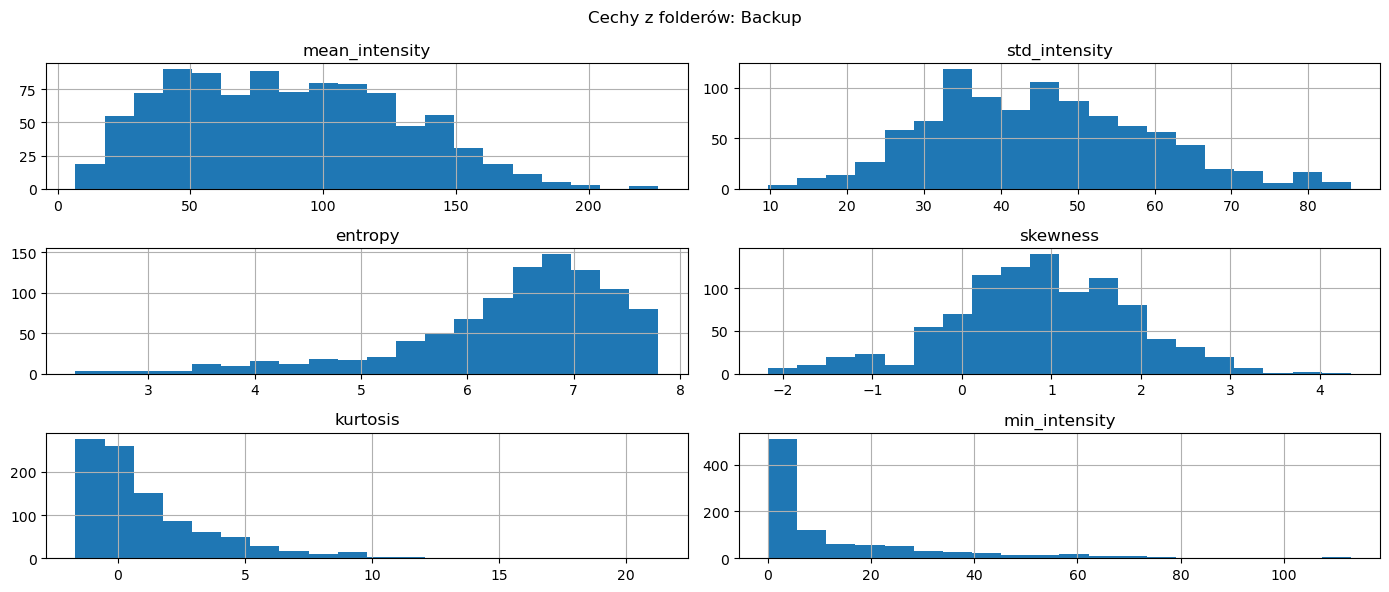

Przetwarzam folder: DATA\CLAHE_Color

📊 Statystyki cech (data_tables/features_from_CLAHE_Color.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      956.000000     956.000000     956.000000     956.000000   
mean       130.411973      64.192998       1.900628     254.352510   
std          9.685156       8.090056       2.172546       1.080142   
min         35.841458      18.857217       0.000000     246.000000   
25%        126.076710      63.151241       0.000000     254.000000   
50%        129.161601      65.606561       1.000000     255.000000   
75%        131.654167      68.201158       3.000000     255.000000   
max        201.822864      88.122391      12.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  956.000000  956.000000  956.000000  956.000000   956.000000   
mean     0.089288   -0.754830    7.705886    0.004463   942.586010   
std      0.316420    1.639979    0.502097    0.022864   8

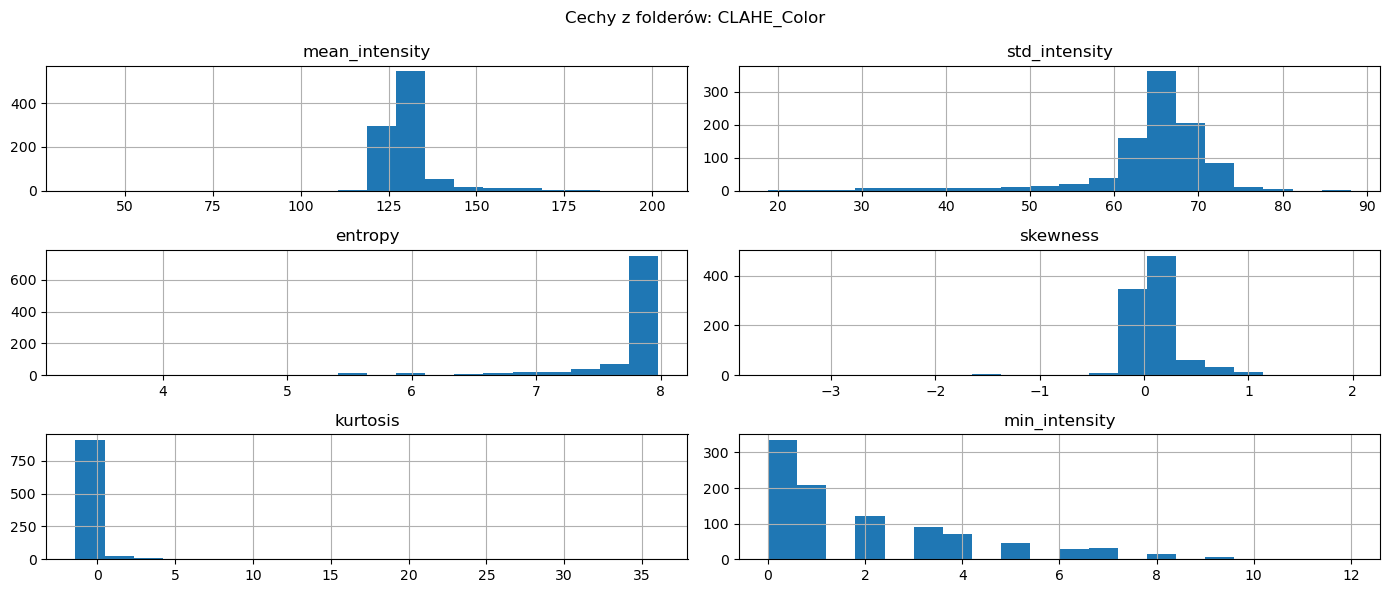

Przetwarzam folder: DATA\Equalized2_Color

📊 Statystyki cech (data_tables/features_from_Equalized2_Color.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      956.000000     956.000000     956.000000     956.000000   
mean       133.100049      69.065397       1.976987     253.633891   
std         11.410926       9.103948       2.504759       1.861672   
min         34.136759      16.263648       0.000000     238.000000   
25%        128.626719      70.390798       0.000000     253.000000   
50%        129.466936      72.259781       1.000000     254.000000   
75%        131.835609      73.007897       3.000000     255.000000   
max        210.326730      99.119080      14.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  956.000000  956.000000  956.000000  956.000000   956.000000   
mean    -0.009480   -0.831989    7.265661    0.023808   590.642658   
std      0.343023    3.115867    1.048278    0.

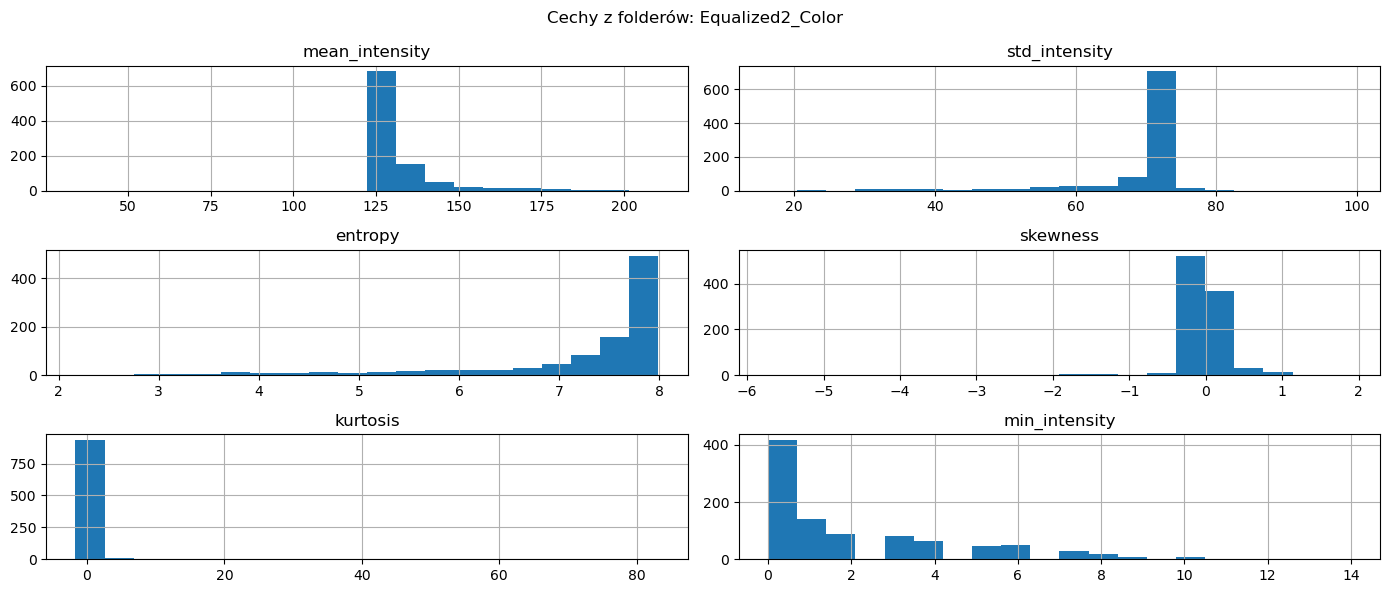

Przetwarzam folder: DATA\Equalized_Copy

📊 Statystyki cech (data_tables/features_from_Equalized_Copy.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      956.000000     956.000000     956.000000          956.0   
mean       133.195583      69.627952       0.004184          255.0   
std         11.443430       9.156121       0.129369            0.0   
min         34.145667      16.533569       0.000000          255.0   
25%        128.703369      70.828044       0.000000          255.0   
50%        129.566516      73.067498       0.000000          255.0   
75%        131.914621      73.535835       0.000000          255.0   
max        210.433534      99.668855       4.000000          255.0   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  956.000000  956.000000  956.000000  956.000000   956.000000   
mean    -0.002179   -0.817882    7.310853    0.023773   599.903359   
std      0.334374    2.968898    1.057442    0.0693

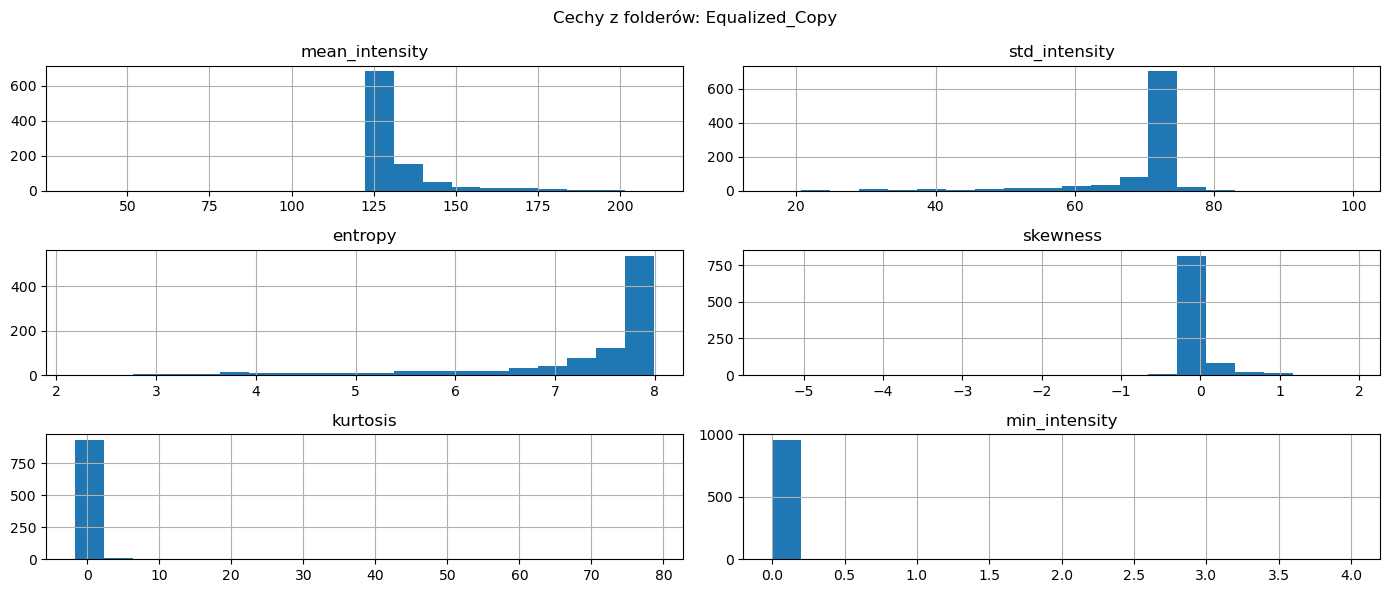

Przetwarzam folder: DATA\Rotated

📊 Statystyki cech (data_tables/features_from_Rotated.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count     4780.000000    4780.000000         4780.0    4780.000000   
mean       119.989996      70.492656            0.0     253.889331   
std          9.471192       5.399127            0.0       1.296934   
min         35.282246      40.686472            0.0     245.000000   
25%        114.893156      68.073818            0.0     253.000000   
50%        119.000100      71.198727            0.0     254.000000   
75%        123.536487      73.844818            0.0     255.000000   
max        193.879783      99.754904            0.0     255.000000   

          skewness     kurtosis      entropy   haralick_1   haralick_2  \
count  4780.000000  4780.000000  4780.000000  4780.000000  4780.000000   
mean     -0.055319    -0.841579     7.535154     0.006955   588.703574   
std       0.302412     0.771619     0.392058     0.01

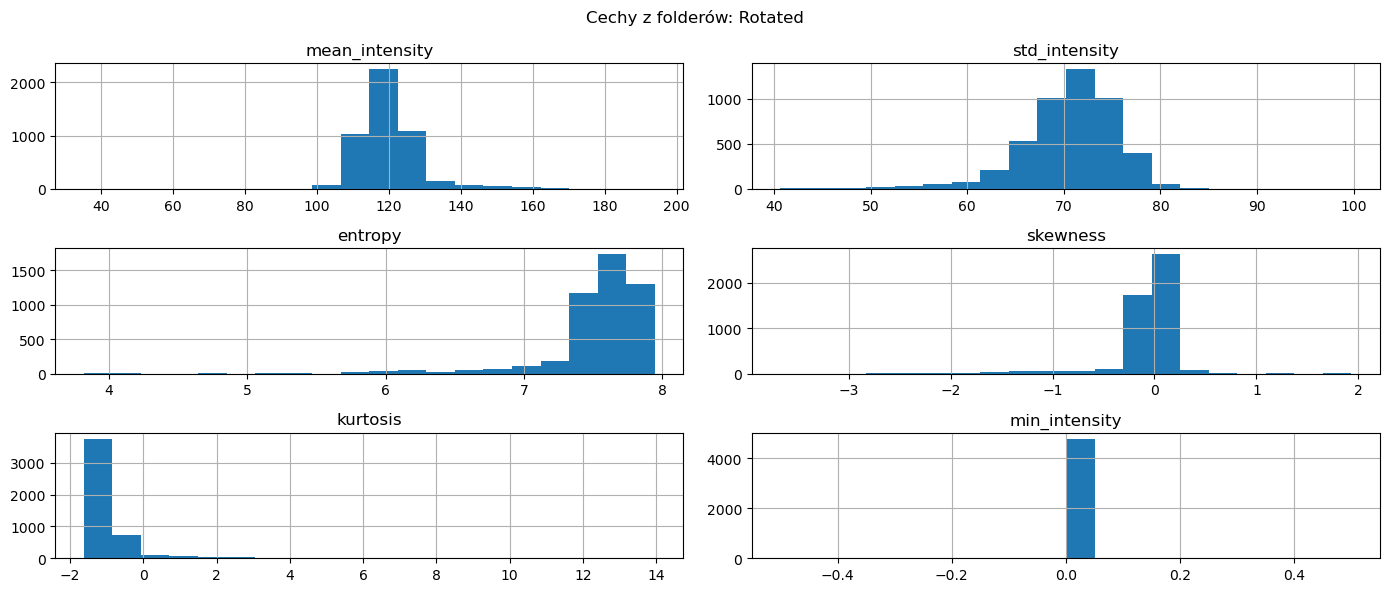

Przetwarzam folder: DATA\Standardized2_Resized

📊 Statystyki cech (data_tables/features_from_Standardized2_Resized.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      956.000000     956.000000     956.000000     956.000000   
mean        88.214385      40.378077      19.834728     224.415272   
std         40.833015      13.808164      19.474722      27.953404   
min          3.455995       7.414216       0.000000      94.000000   
25%         54.895074      30.365348       6.000000     213.000000   
50%         89.740733      39.270209      14.000000     234.000000   
75%        117.900316      49.894663      28.000000     244.000000   
max        222.026846      82.668432     121.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  956.000000  956.000000  956.000000  956.000000   956.000000   
mean     0.871690    1.391978    6.308299    0.032384   142.976545   
std      1.024836    2.971651    1.00

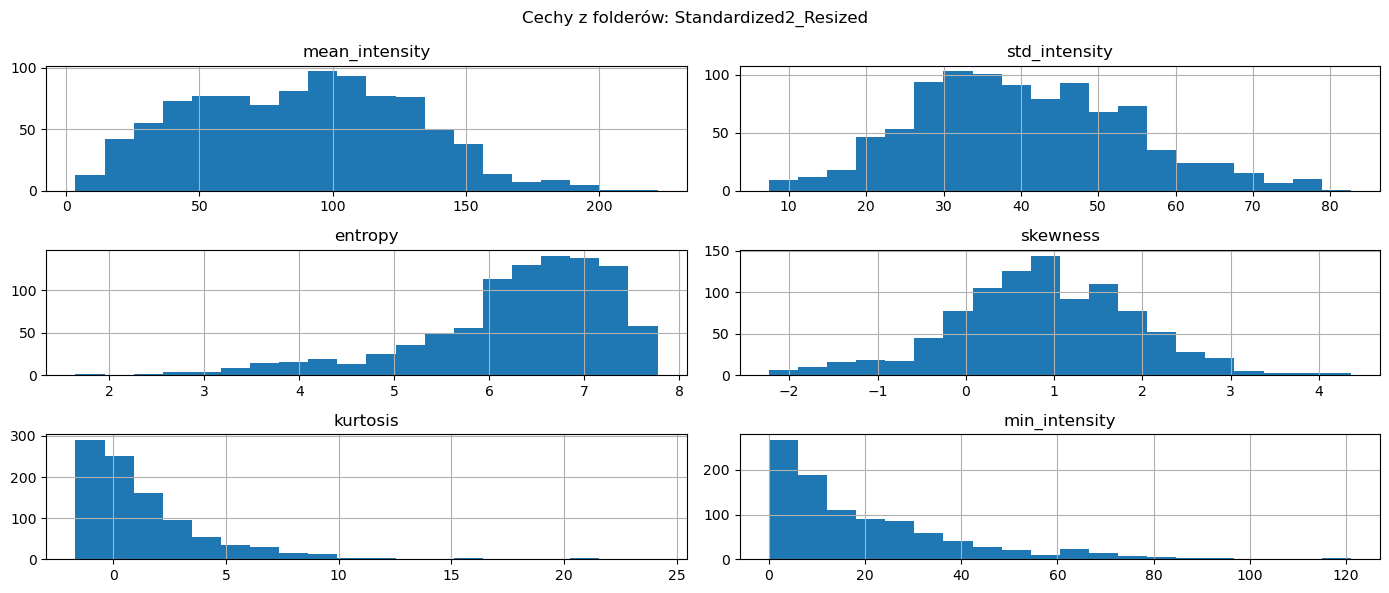

Przetwarzam folder: DATA\Standardized_Copy

📊 Statystyki cech (data_tables/features_from_Standardized_Copy.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      956.000000     956.000000     956.000000     956.000000   
mean        88.214385      40.378077      19.834728     224.415272   
std         40.833015      13.808164      19.474722      27.953404   
min          3.455995       7.414216       0.000000      94.000000   
25%         54.895074      30.365348       6.000000     213.000000   
50%         89.740733      39.270209      14.000000     234.000000   
75%        117.900316      49.894663      28.000000     244.000000   
max        222.026846      82.668432     121.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  956.000000  956.000000  956.000000  956.000000   956.000000   
mean     0.871690    1.391978    6.308299    0.032384   142.976545   
std      1.024836    2.971651    1.006407    

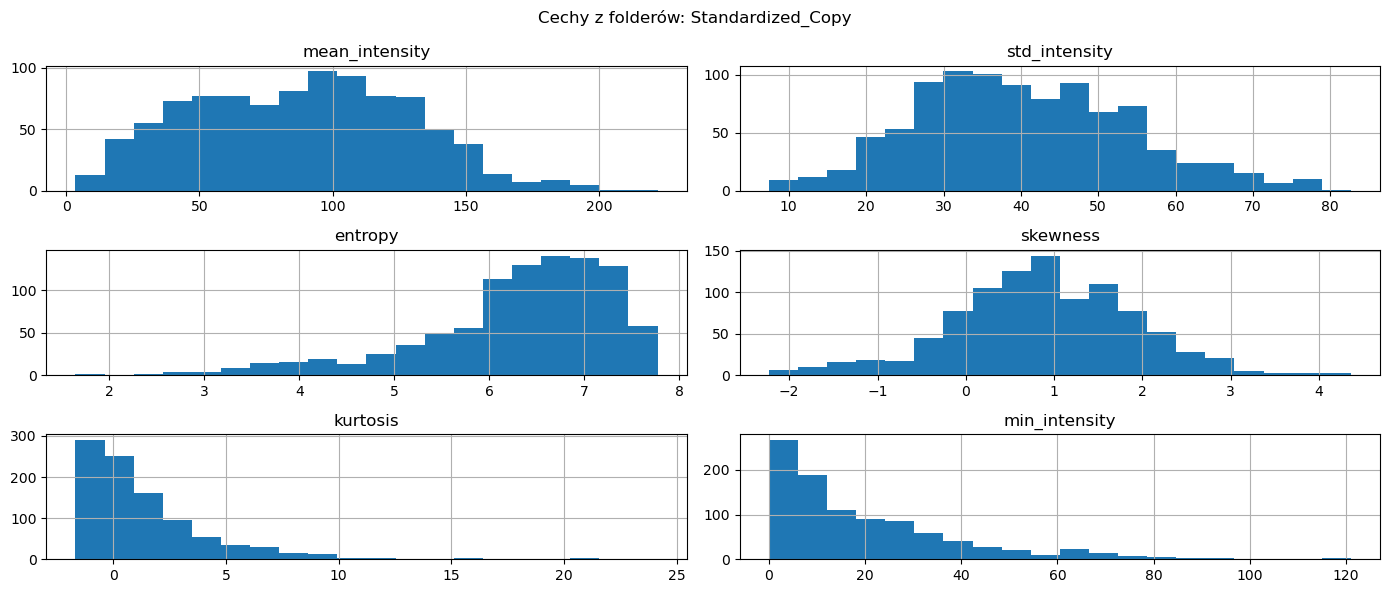

Przetwarzam folder: DATA\Train_Test_Valid

📊 Statystyki cech (data_tables/features_from_Train_Test_Valid.csv):

       mean_intensity  std_intensity  min_intensity  max_intensity  \
count      961.000000     961.000000     961.000000     961.000000   
mean        86.381546      45.013655      13.285120     233.064516   
std         42.017497      14.233452      19.361686      29.258332   
min          6.759825       9.674952       0.000000      69.000000   
25%         51.181382      34.245778       0.000000     221.000000   
50%         83.545769      44.417839       4.000000     246.000000   
75%        117.240613      54.477694      19.000000     254.000000   
max        226.289062      85.534833     113.000000     255.000000   

         skewness    kurtosis     entropy  haralick_1   haralick_2  \
count  961.000000  961.000000  961.000000  961.000000   961.000000   
mean     0.866168    1.208677    6.435501    0.032393   197.472418   
std      1.010768    2.741300    0.999555    0.

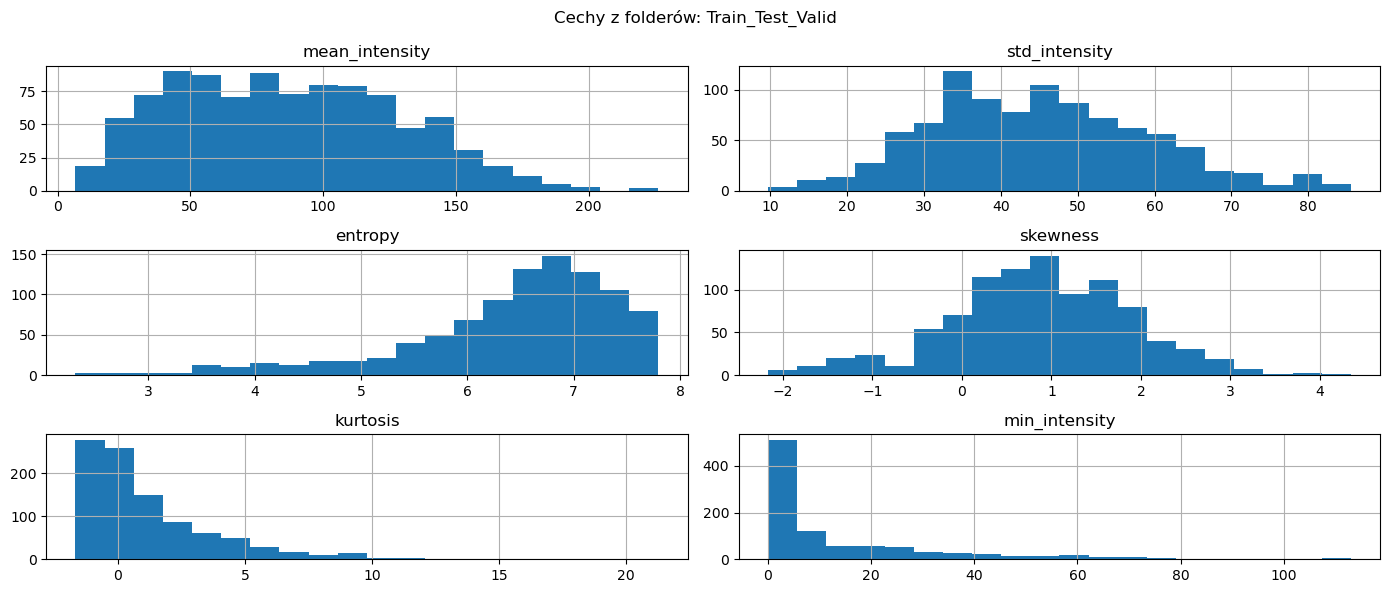

In [3]:
import os

base_folder = "DATA"
subfolders = [os.path.join(base_folder, f) for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

for folder in subfolders:
    print(f"Przetwarzam folder: {folder}")
    extract_features_from_folders([folder])  # funkcja z poprzednich kroków
